# Извлечение признаков из текста, "Мешок слов" - пишем код вручную

In [5]:
import os
path = os.getcwd()
path

'C:\\Users\\aleks\\Desktop\\courseML\\projects'

In [9]:
with open ('C:\\Users\\aleks\\Desktop\\courseML\\18-Naive-Bayes-and-NLP\\One.txt') as mytext :
    words_one = mytext.read().lower().split()
    uniq_words_one = set(words_one)

In [20]:
uniq_words_one

{'a',
 'about',
 'animals',
 'are',
 'canine',
 'dogs',
 'furry',
 'is',
 'our',
 'pets',
 'story',
 'this'}

In [22]:
with open ('C:\\Users\\aleks\\Desktop\\courseML\\18-Naive-Bayes-and-NLP\\Two.txt') as mytext :
    words_two = mytext.read().lower().split()
    uniq_words_two = set(words_two)

In [43]:
uniq_words_two

{'a',
 'about',
 'catching',
 'fun',
 'is',
 'popular',
 'sport',
 'story',
 'surfing',
 'this',
 'water',
 'waves'}

In [24]:
all_uniq_words = set()
all_uniq_words.update(uniq_words_one)
all_uniq_words.update(uniq_words_two)

In [25]:
all_uniq_words

{'a',
 'about',
 'animals',
 'are',
 'canine',
 'catching',
 'dogs',
 'fun',
 'furry',
 'is',
 'our',
 'pets',
 'popular',
 'sport',
 'story',
 'surfing',
 'this',
 'water',
 'waves'}

In [27]:
full_vocab = dict()
i = 0
for word in all_uniq_words:
    full_vocab[word] = i
    i = i + 1

In [28]:
full_vocab

{'are': 0,
 'popular': 1,
 'this': 2,
 'waves': 3,
 'a': 4,
 'sport': 5,
 'water': 6,
 'pets': 7,
 'surfing': 8,
 'our': 9,
 'fun': 10,
 'catching': 11,
 'about': 12,
 'furry': 13,
 'dogs': 14,
 'canine': 15,
 'is': 16,
 'animals': 17,
 'story': 18}

In [47]:
one_freq = [0] * len(full_vocab)
two_freq = [0] * len(full_vocab)
all_words = [''] * len(full_vocab)

In [32]:
one_freq

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [48]:
with open ('C:\\Users\\aleks\\Desktop\\courseML\\18-Naive-Bayes-and-NLP\\One.txt') as mytext :
    one_text = mytext.read().lower().split()
for word in one_text:
    word_ind = full_vocab[word]
    one_freq[word_ind] += 1

In [49]:
one_freq

[1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 2, 1, 1, 1, 1]

In [50]:
with open ('C:\\Users\\aleks\\Desktop\\courseML\\18-Naive-Bayes-and-NLP\\Two.txt') as mytext :
    two_text = mytext.read().lower().split()
for word in two_text:
    word_ind = full_vocab[word]
    two_freq[word_ind] += 1

In [51]:
two_freq

[0, 1, 1, 1, 1, 1, 1, 0, 2, 0, 1, 1, 1, 0, 0, 0, 3, 0, 1]

In [52]:
for word in full_vocab:
    word_ind = full_vocab[word]
    all_words[word_ind] = word

In [53]:
all_words

['are',
 'popular',
 'this',
 'waves',
 'a',
 'sport',
 'water',
 'pets',
 'surfing',
 'our',
 'fun',
 'catching',
 'about',
 'furry',
 'dogs',
 'canine',
 'is',
 'animals',
 'story']

In [54]:
full_vocab

{'are': 0,
 'popular': 1,
 'this': 2,
 'waves': 3,
 'a': 4,
 'sport': 5,
 'water': 6,
 'pets': 7,
 'surfing': 8,
 'our': 9,
 'fun': 10,
 'catching': 11,
 'about': 12,
 'furry': 13,
 'dogs': 14,
 'canine': 15,
 'is': 16,
 'animals': 17,
 'story': 18}

In [56]:
import pandas as pd
bow = pd.DataFrame(data = [one_freq, two_freq], columns = all_words)

# Sklearn edition

In [57]:
text = ['This is a line',
        "This is another line",
       "Completely different line"]

In [65]:
from sklearn.feature_extraction.text import CountVectorizer,  # Создание мешка слов
                                            TfidfTransformer #  tf-idf

In [72]:
cv = CountVectorizer()
sparse_matrix = cv.fit_transform(text)
sparse_matrix.todense()

matrix([[0, 0, 0, 1, 1, 1],
        [1, 0, 0, 1, 1, 1],
        [0, 1, 1, 0, 1, 0]], dtype=int64)

In [64]:
cv.vocabulary_

{'line': 2, 'completely': 0, 'different': 1}

In [66]:
tfidf = TfidfTransformer()

In [67]:
sparse_matrix

<3x3 sparse matrix of type '<class 'numpy.int64'>'
	with 5 stored elements in Compressed Sparse Row format>

In [73]:
results = tfidf.fit_transform(sparse_matrix) # BOV -> TF-IDF

In [74]:
results.todense()

matrix([[0.        , 0.        , 0.        , 0.61980538, 0.48133417,
         0.61980538],
        [0.63174505, 0.        , 0.        , 0.4804584 , 0.37311881,
         0.4804584 ],
        [0.        , 0.65249088, 0.65249088, 0.        , 0.38537163,
         0.        ]])

In [75]:
cv.vocabulary_

{'this': 5, 'is': 3, 'line': 4, 'another': 0, 'completely': 1, 'different': 2}

# Анализ данных

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('..//DATA/airline_tweets.csv')

In [78]:
df

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,569587686496825344,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,NaN,2015-02-22 12:01:01 -0800,NaN,NaN
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2015-02-22 11:59:46 -0800,Texas,NaN
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada)


<AxesSubplot:xlabel='airline_sentiment', ylabel='count'>

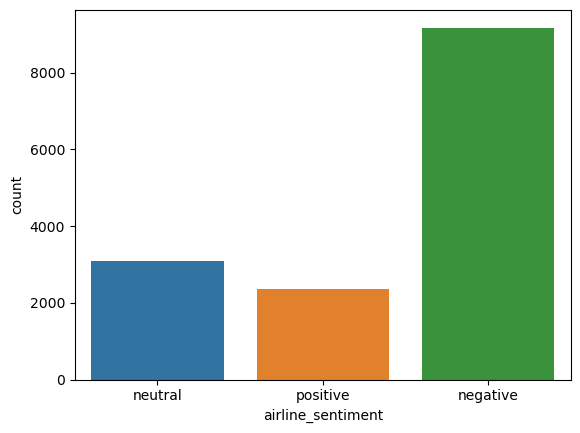

In [79]:
sns.countplot(data = df, x = 'airline_sentiment')

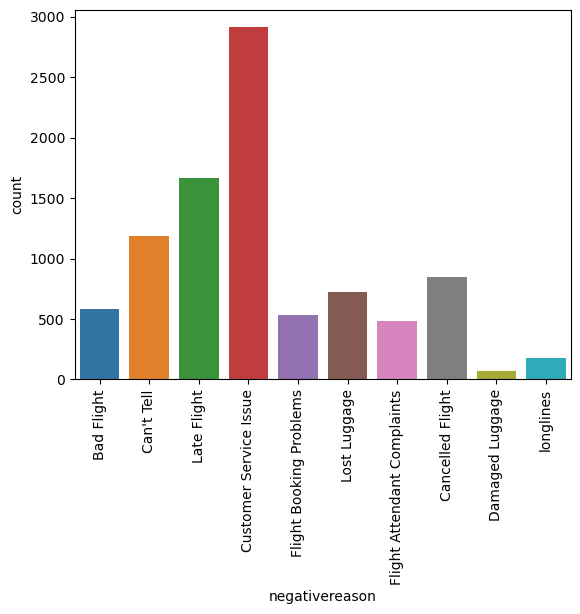

In [82]:
sns.countplot(data=df, x = 'negativereason')
plt.xticks(rotation=90);

<AxesSubplot:xlabel='airline', ylabel='count'>

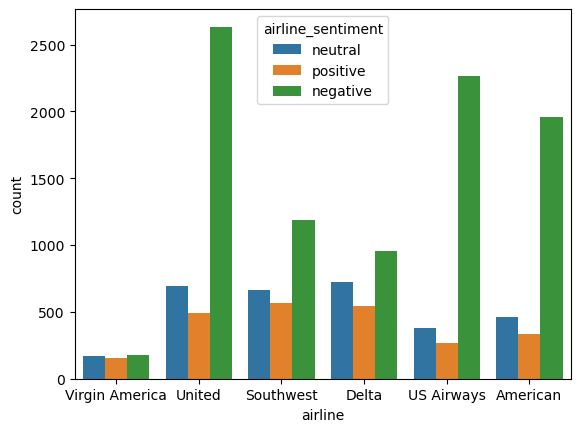

In [83]:
sns.countplot(data= df, x='airline', hue = 'airline_sentiment')

In [9]:
data = df[['airline_sentiment','text']]
data

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...
...,...,...
14635,positive,@AmericanAir thank you we got on a different f...
14636,negative,@AmericanAir leaving over 20 minutes Late Flig...
14637,neutral,@AmericanAir Please bring American Airlines to...
14638,negative,"@AmericanAir you have my money, you change my ..."


In [10]:
X = data['text']
y = data['airline_sentiment']

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')

In [13]:
tfidf.fit(X_train)

TfidfVectorizer(stop_words='english')

In [14]:
X_train_tfidf = tfidf.transform(X_train)

In [15]:
X_test_tfidf = tfidf.transform(X_test)

# Модели(NBC)

In [16]:
from sklearn.naive_bayes import MultinomialNB

In [17]:
nb = MultinomialNB()
nb.fit(X_train_tfidf, y_train)

MultinomialNB()

In [18]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(max_iter = 1000)
log_model.fit(X_train_tfidf, y_train)

LogisticRegression(max_iter=1000)

In [23]:
from sklearn.svm import SVC, LinearSVC
rbf_svc = SVC()
rbf_svc.fit(X_train_tfidf,y_train)
linear_SVC = LinearSVC()
linear_SVC.fit(X_train_tfidf,y_train)

LinearSVC()

In [24]:
from sklearn.metrics import plot_confusion_matrix, classification_report

In [25]:
def report(model):
    preds = model.predict(X_test_tfidf)
    print(classification_report(y_test,preds))
    plot_confusion_matrix(model,X_test_tfidf,y_test)

              precision    recall  f1-score   support

    negative       0.66      0.99      0.79      1817
     neutral       0.79      0.15      0.26       628
    positive       0.89      0.14      0.24       483

    accuracy                           0.67      2928
   macro avg       0.78      0.43      0.43      2928
weighted avg       0.73      0.67      0.59      2928



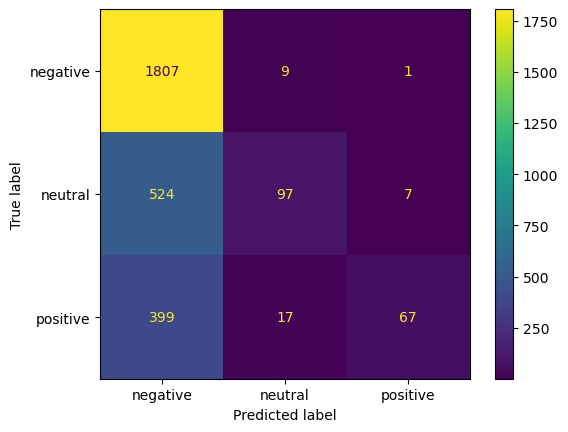

In [26]:
report(nb)

              precision    recall  f1-score   support

    negative       0.80      0.93      0.86      1817
     neutral       0.63      0.47      0.54       628
    positive       0.82      0.58      0.68       483

    accuracy                           0.77      2928
   macro avg       0.75      0.66      0.69      2928
weighted avg       0.77      0.77      0.76      2928



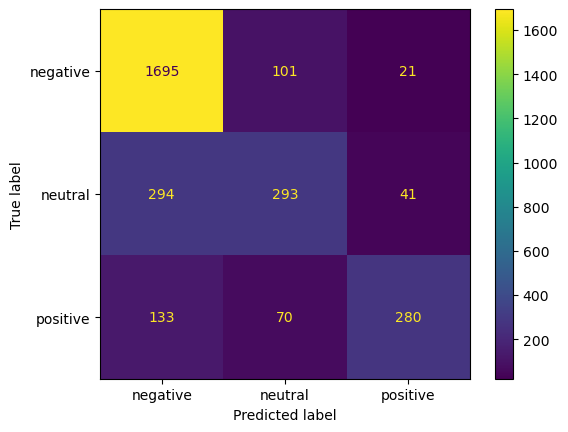

In [27]:
report(log_model)

              precision    recall  f1-score   support

    negative       0.78      0.95      0.86      1817
     neutral       0.67      0.41      0.51       628
    positive       0.81      0.56      0.66       483

    accuracy                           0.77      2928
   macro avg       0.75      0.64      0.67      2928
weighted avg       0.76      0.77      0.75      2928



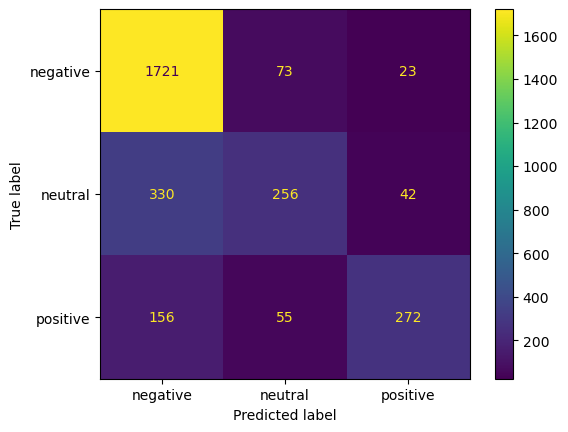

In [28]:
report(rbf_svc)

              precision    recall  f1-score   support

    negative       0.82      0.89      0.86      1817
     neutral       0.59      0.52      0.55       628
    positive       0.76      0.64      0.69       483

    accuracy                           0.77      2928
   macro avg       0.73      0.68      0.70      2928
weighted avg       0.76      0.77      0.77      2928



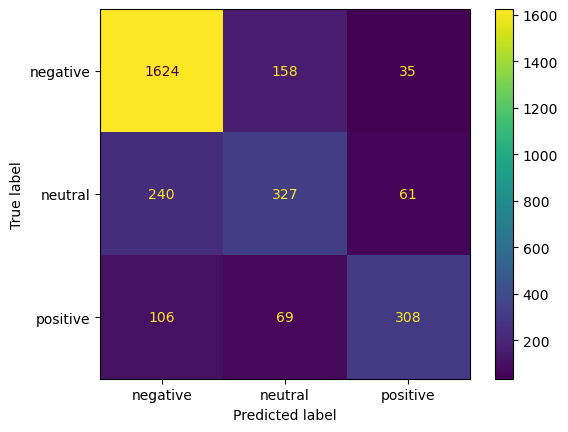

In [29]:
report(linear_SVC)

In [31]:
from sklearn.pipeline import Pipeline
pipe = Pipeline([('tfidf',TfidfVectorizer()),
                 ('svc',LinearSVC())])

In [32]:
pipe.fit(X,y)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('svc', LinearSVC())])

In [33]:
pipe.predict(['good flight'])

array(['positive'], dtype=object)

In [34]:
pipe.predict(['bad flight'])

array(['negative'], dtype=object)

In [40]:
pipe.predict(['flight low'])

array(['neutral'], dtype=object)